# Multivariable Linear Regression on CO2 Emissions from Cars

In this exercise we will be trying to predict or assess the relationship of an outcome based on two or more variables.
Using this dataset of cars we will try and model CO2 emissions using other factors of the car.
<br>
<br>
Variables: **Car** | **Model** | **Volume (ml)** | **Weight (kg)** | **CO2 (g/km)**

## Data Cleaning and Preprocessing

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
from seaborn import regplot

In [3]:
# Reading in the data as a pandas dataframe
raw_df = pd.read_csv("cars.csv")

In [4]:
# Removing irrelevent columns
df = raw_df.drop(['Car', 'Model'], axis = 1)
df.head()

,Volume,Weight,CO2
0,1000,790,99
1,1200,1160,95
2,1000,929,95
3,900,865,90
4,1500,1140,105


## Running a two-variable Linear Regression

In [5]:
# Selecting our variables and reshaping for the linear regression model
X = df['Volume'].values.reshape(-1,1)
Y = df['CO2'].values.reshape(-1,1)

In [6]:
# Running the model
lr = LinearRegression()
reg = lr.fit(X, Y)
Y_pred = lr.predict(X) 

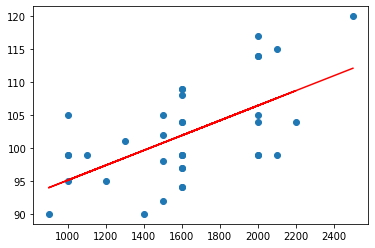

In [7]:
# Plotting the variables with a calculated line of best fit
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'red')
plt.show()

## Running a Multivariable Linear Regression

First, we set up the feature variables for our multiple linear regression model.

In [8]:
# Seperating our variables between the CO2 emissions column and the rest
X_m = df.drop('CO2', axis = 1)
y_m = df['CO2']

Here we split the data into test and train sets, with a set random state for reproducibility.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_m, y_m, test_size=0.3, random_state=101)

In [10]:
reg_m = lr.fit(X_train, y_train)
y_m_pred = lr.predict(X_test)

In [11]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_m_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_m_pred))

mean_squared_error :  34.342804271962294
mean_absolute_error :  4.864215595066984


In [15]:
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, y_m_pred))

mean_absolute_percentage_error :  0.047427671683040094


The **mean squared error (MSE)** metric determines how close the regression line is to our values. A MSE of 34 is rather high, likely due to the low sample size. This indicates that our regression line is not reliable for predicting new data points. 
<br>
The **mean absolute error (MAE)** takes the absolute difference between predicted and actual values and averages it over the whole of our data. It is not penalized by outliers, and provides an even measure for how well the model performs
<br>
The **mean absolute percentage error (MAPE)** is a measure of prediction accuracy, returning the error as a percentage. A low MAPE score is seen as a good indicator of an accurate model.

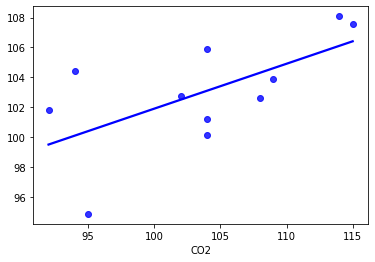

In [13]:
sns.regplot(x=y_test, y=y_m_pred, ci=None, color="b")

Predicting CO2 emission based on given volume and weight

In [14]:
X_predict = ([[1800, 2000]])
y_predict = lr.predict(X_predict)
print(y_predict)

[109.42692313]
